# VR Survey

This notebook will reproduce some charts related to a survey conducted to understand the point of view of researchers, developers, designers and users in order to target software testing activity at points that these interest groups deem important. 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the csv file
results = pd.read_csv('survey/responses.csv')

# Number of responders by questions:

In [30]:
results.count()

Carimbo de data/hora                                                                                                                      88
How do you rate your profile?                                                                                                             88
How often do you use virtual reality (gaming, graphics) applications?                                                                     88
What VR applications do you use more?                                                                                                     88
Malfunction, or bugs contributes to a negative experience using VR (gaming, graphics) applications. Regarding the above statement you:    88
S2.Visual                                                                                                                                 88
S2.Audio                                                                                                                                  88
S2.Design    

In [31]:
# Do some minor cleanups on the data
# Rename the columns to make it easier to manipulate
# The data comes in through a dictionary so we can not assume order stays the
# same so must name each column

column_names = {'Carimbo de data/hora': 'timestamp',
                'How do you rate your profile?': 'profile',
                'How often do you use virtual reality (gaming, graphics) applications?': 'freq-vr',
                'What VR applications do you use more?': 'most-used-vr',
                'Malfunction, or bugs contributes to a negative experience using VR (gaming, graphics) applications. Regarding the above statement you:': 'bad-experience',
                'S2.Visual': 'annoy-visual',
                'S2.Audio': 'annoy-audio',
                'S2.Design': 'annoy-design',
                'S2.IA': 'annoy-ia',
                'S2.Physics': 'annoy-physics',
                'S2.Stability': 'annoy-stability',
                'S2.Performance': 'annoy-performance',
                'S2.Networking': 'annoy-net', 
                'Technical capabilities of the application (e.g. head tracking, resolution, latency)': 'impeditive-technical',
                'Nausea when using the app': 'impeditive-nausea',
                'Fidelity of virtual world (e.g. how real does it look)': 'impeditive-virtual_world',
                'Awareness of real world (e.g. who is there when using a head mounted display)': 'impeditive-real_world',
                'Interacting with real world objects (e.g. picking up a cup)': 'impeditive-interaction', 
                'Interacting with real world peripherals (e.g. via keyboard, mouse, motion controllers..)': 'impeditive-peripherals',
                'Providing input to the virtual world (e.g. via peripherals, gesture, voice etc.)': 'impeditive-inputs',
                'S4.Visual': 'faults-visual',
                'S4.Audio': 'faults-audio',
                'S4.Level Design': 'faults-level_design',
                'S4.IA': 'faults-ia',
                'S4.Physics': 'faults-physiscs',
                'S4.Stability': 'faults-stability',
                'S4.Performance': 'faults-performance',
                'S4.Networking': 'faults-net',
                'Would you like to list a possible flaw fault or bug that was not described in the list above and you judge as critial?': 'faults-other',
                'Enter your e-mail adress if you would like toreceive the compiled search results': 'notify',
                
                }
results.rename(columns=column_names, inplace=True)
results.timestamp = pd.to_datetime(results.timestamp)

In [32]:
results['impeditive-inputs'].head()

0     Neutral
1     Neutral
2     Neutral
3    Disagree
4       Agree
Name: impeditive-inputs, dtype: object

## How responders rate theier profile?

In [33]:

results['profile'].value_counts()

User         41
Student      18
Teacher      14
Designer      8
Developer     7
Name: profile, dtype: int64

dict_keys(['User', 'Student', 'Teacher', 'Designer', 'Developer']) [41, 18, 14, 8, 7]


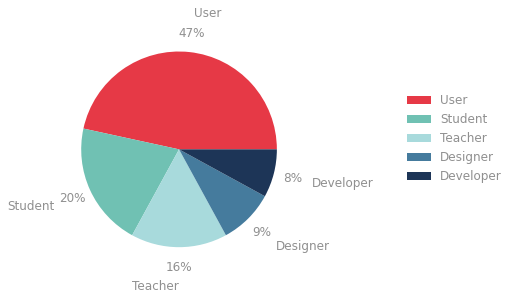

In [34]:
#color_palette_list = ['#DEB4B7', '#BDE3E9', '#9DD9F0', '#D2BDDB','#F6CDE0', '#F3A58B', '#FCF5BF']
color_palette_list = ['#e63946', '#70c1b3', '#a8dadc', '#457b9d', '#1d3557', '#AA17D5', '#F88E0D']

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['profile'].value_counts())

#get the keys and the values of the dict
labels = results_dict.keys()
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

# Frequency of use in relation to the profile

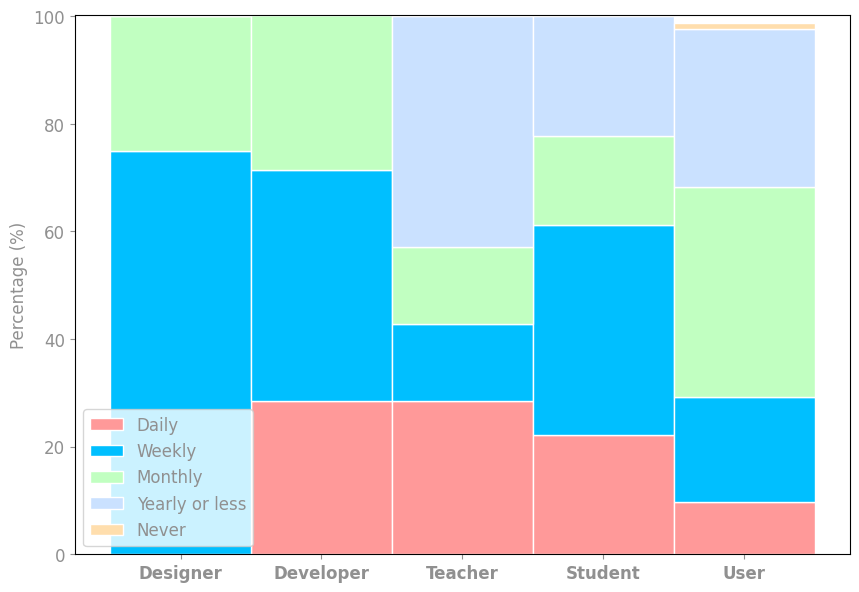

In [55]:
import numpy as np
import matplotlib.pyplot as plt

#Get values from the group and categories
period   = ["Daily", "Weekly", "Monthly", "Yearly or less", "Never"]
role      = ["Designer", "Developer", "Teacher", "Student", "User"]

daily     = [0,  28.57, 28.57, 22.22, 9.76]
weekly    = [75, 42.86, 14.29, 38.89, 19.51]
monthly   = [25, 28.75, 14.29, 16.67, 39.02]
yearly    = [0,  0    , 42.86, 22.22, 29.27]
never     = [0,  0    , 0   , 0    , 1.1]

designer  = [0    , 75   , 25   , 0    , 0]
developer = [28.57, 42.86, 28.75, 0    , 0]
professor = [28.57, 14.29, 14.29, 42.86, 0]
student   = [22.22, 38.89, 16.67, 22.22, 0]
user      = [9.76,  19.51, 39.02, 29.27, 2.4]

    
#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']

# The position of the bars on the x-axis
r = range(len(role))
barWidth = 1

#plot bars
plt.figure(figsize=(10,7))

plt.bar(r, daily, color=colors[0], edgecolor='white', width=barWidth, label= period[0])
plt.bar(r, weekly, bottom=np.array(daily), color=colors[1], edgecolor='white', width=barWidth, label=period[1])
plt.bar(r, monthly, bottom=np.array(daily)+np.array(weekly), color=colors[2], edgecolor='white', width=barWidth, label=period[2])
plt.bar(r, yearly, bottom=np.array(daily)+np.array(weekly)+np.array(monthly), color=colors[3], edgecolor='white', width=barWidth, label=period[3])
plt.bar(r, never, bottom=np.array(daily)+np.array(weekly)+np.array(monthly)+np.array(yearly), color=colors[4], edgecolor='white', width=barWidth, label=period[4])

#time frame point of view
#plt.bar(r, designer, color=colors[0], edgecolor='white', width=barWidth, label="Designers")
#plt.bar(r, developer, bottom=np.array(designer), color=colors[1], edgecolor='white', width=barWidth, label='Developers')
#plt.bar(r, professor, bottom=np.array(designer)+np.array(developer), color=colors[2], edgecolor='white', width=barWidth, label='Professors')
#plt.bar(r, student, bottom=np.array(designer)+np.array(developer)+np.array(professor), color=colors[3], edgecolor='white', width=barWidth, label='Student')
#plt.bar(r, user, bottom=np.array(designer)+np.array(developer)+np.array(professor)+np.array(student), color=colors[4], edgecolor='white', width=barWidth, label='Users')

plt.legend()

# Custom X axis
plt.xticks(r, role, fontweight='bold')
plt.ylabel("Percentage (%)")
#plt.savefig("stacked1.png")
plt.show()

# What VR applications do you use more?

dict_keys(['Gaming', 'Media', 'Simulation', 'Productivity', 'Modelling', 'Therapeutic']) [58, 10, 10, 5, 3, 2]


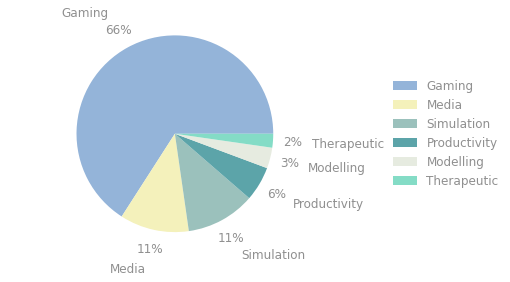

In [36]:
color_palette_list = ['#94B4D9', '#f4f1bb', '#9bc1bc', '#5ca4a9', '#e6ebe0', '#84dcc6']

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['most-used-vr'].value_counts())

#get the keys and the values of the dict
labels = results_dict.keys()
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

# How often do you use VR applications?


dict_keys(['Weekly', 'Monthly', 'Yearly or less often', 'Daily', 'Never']) [26, 25, 22, 14, 1]


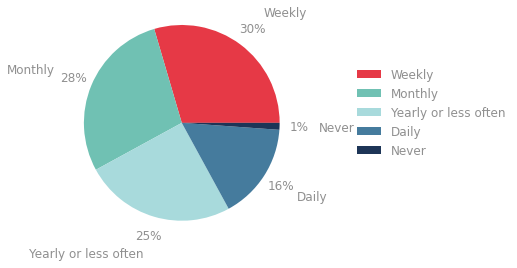

In [37]:
color_palette_list = ['#e63946', '#70c1b3', '#a8dadc', '#457b9d', '#1d3557']

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['freq-vr'].value_counts())

#get the keys and the values of the dict
labels = results_dict.keys()
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

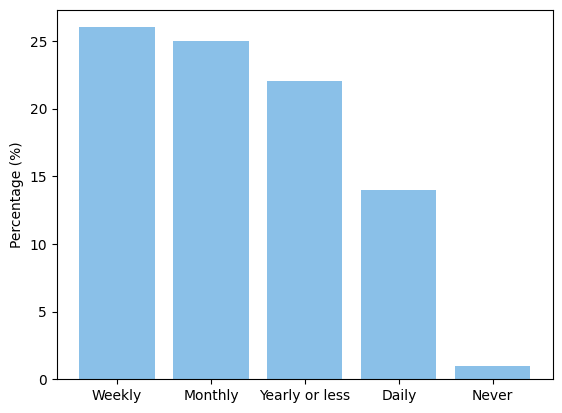

In [56]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Weekly', 'Monthly', 'Yearly or less', 'Daily', 'Never')
y_pos = np.arange(len(objects))
performance =  [26, 25, 22, 14, 1]

#3C97DA

plt.bar(y_pos, performance, align='center', alpha=0.6, color = '#3C97DA')
plt.ylabel("Number of respondents")
plt.xticks(y_pos, objects)
#plt.title('Frequency of using VR applications')

plt.show()

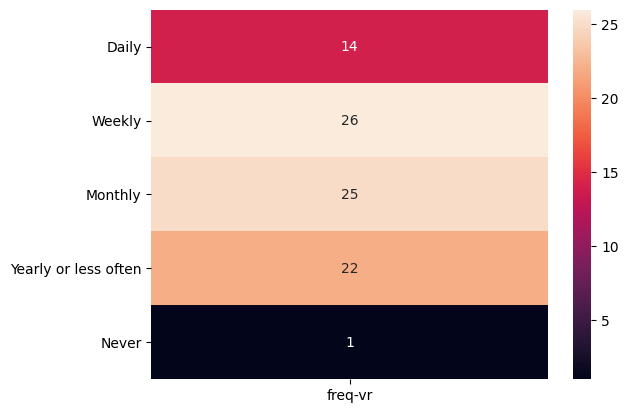

In [39]:
import seaborn as sns

counts = []
counts.append(results['freq-vr'].value_counts())

frame = pd.concat(counts, keys = ['freq-vr'], axis= 1)
frame = frame.reindex(['Daily', 'Weekly', 'Monthly', 'Yearly or less often', 'Never'])

sns.heatmap(frame, annot=True)

# Malfunction, or bugs contributes to a negative experience using VR applications. Regarding the above statement you:

In [40]:
#get the likert scale results
bad_experience = pd.DataFrame(results['bad-experience'])
columns = bad_experience['bad-experience'].unique()

#convert from categorical to numerical
responses = {'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5}
bad_experience['numerical'] = bad_experience['bad-experience'].map(responses)

#define the condition of the likert scale
bad_experience.insert(loc=0, column='condition', value='cond')

#order the title of the columns
columns_titles = ['condition', 'numerical', 'bad-experience']
bad_experience = bad_experience.reindex(columns=columns_titles)

bad_experience.head()


,condition,numerical,bad-experience
0,cond,5,Strongly Agree
1,cond,4,Agree
2,cond,5,Strongly Agree
3,cond,5,Strongly Agree
4,cond,4,Agree


['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'] [2, 3, 14, 39, 30]


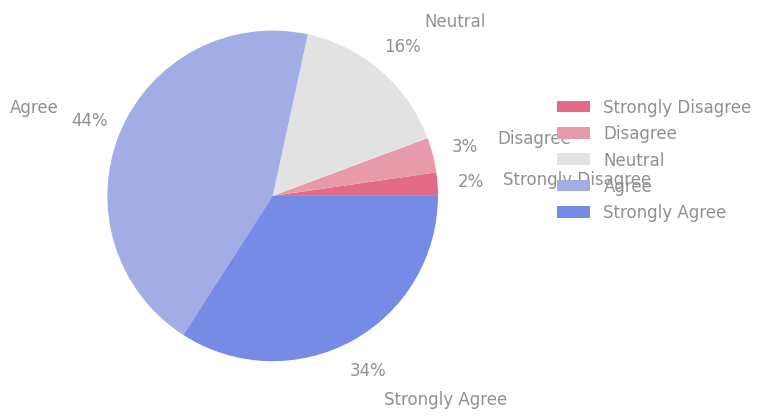

In [41]:
color_palette_list = ['#e16a86', '#e79aa9' , '#e2e2e2', '#a2ace5', '#768be6', ]

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['bad-experience'].value_counts())

#get the keys and the values of the dict
labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))


# When using VR (gaming, graphics) apps, which of these aspects of their usage or usability that annoy or frustrate you?

In [42]:
"""
'S2.Visual': 'annoy-visual',
'S2.Audio': 'annoy-audio',
'S2.Design': 'annoy-design',
'S2.IA': 'annoy-ia',
'S2.Physics': 'annoy-physics',
'S2.Stability': 'annoy-stability',
'S2.Performance': 'annoy-performance',
'S2.Networking': 'annoy-net', 
"""

annoy_list = []
dict_remap = {1: "Very Low", 2: "Low", 3: "Regular", 4: "High", 5: "Very High"}

for type_annoy in ['annoy-visual', 'annoy-audio', 'annoy-design', 'annoy-ia', 'annoy-physics', 'annoy-stability', 'annoy-performance', 'annoy-net']:

    #will remap the values (1 to 5) into string
    results.replace(type_annoy, dict_remap)

    #add to the annoy list
    annoy_list.append(results[type_annoy].value_counts())

#frame with the annoy results remaped to a string
frame_annoy = pd.concat(annoy_list, keys = ['Visual', 'Audio', 'Design', 'Artificial Inteligence', 'Physics', 'Stability', 'Performance', 'Networking'], axis= 1)


frame_annoy


,Visual,Audio,Design,Artificial Inteligence,Physics,Stability,Performance,Networking
1,9,18,10,14,14,8,5,21
2,10,21,6,14,14,7,4,16
3,14,22,28,25,21,18,18,20
4,35,19,29,25,28,29,24,20
5,20,8,15,10,11,26,37,11


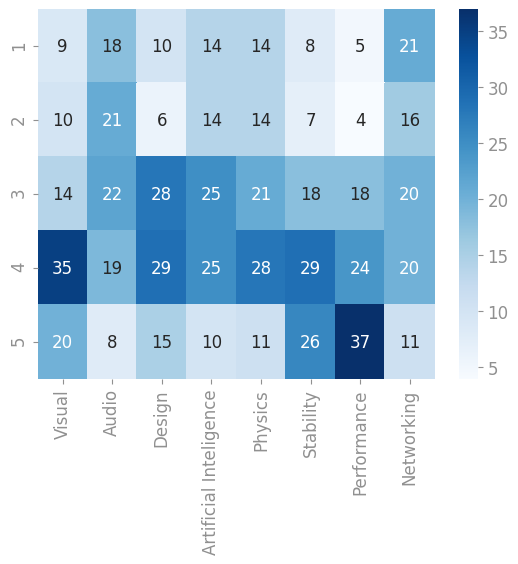

In [43]:
import seaborn as sns
sns.heatmap(frame_annoy, cmap="Blues" ,annot=True)

# Hardware section

### To what extent do you agree that the following IMPEDE your ability to use and enjoy VR applications? 

In [44]:
"""
'Technical capabilities of the application (e.g. head tracking, resolution, latency)': 'impeditive-technical',
'Nausea when using the app': 'impeditive-nausea',
'Fidelity of virtual world (e.g. how real does it look)': 'impeditive-virtual_world',
'Awareness of real world (e.g. who is there when using a head mounted display)': 'impeditive-real_world',
'Interacting with real world objects (e.g. picking up a cup)': 'impeditive-interaction', 
'Interacting with real world peripherals (e.g. via keyboardmousemotion controllers..)': 'impeditive-peripherals',
'Providing input to the virtual world (e.g. via peripherals gesture voice etc.)': 'impeditive-inputs',
"""

hardware_list = []
dict_remap = {1: "Very Low", 2: "Low", 3: "Regular", 4: "High", 5: "Very High"}

for type_annoy in ['impeditive-technical', 'impeditive-nausea', 'impeditive-virtual_world', 'impeditive-real_world', 'impeditive-interaction', 'impeditive-interaction', 'impeditive-peripherals', 'impeditive-inputs']:

    #will remap the values (1 to 5) into string
    results.replace(type_annoy, dict_remap)

    #add to the annoy list
    hardware_list.append(results[type_annoy].value_counts())

#frame with the hardware results remaped to a string
frame_hardware = pd.concat(hardware_list, keys = ['Visual', 'Audio', 'Artificial Inteligence', 'Physics', 'Stability', 'Performance', 'Networking'], axis= 1)



frame_hardware


,Visual,Audio,Artificial Inteligence,Physics,Stability,Performance,Networking
Agree,47,18,29,28,29,29,37
Disagree,2,16,15,14,16,16,11
Neutral,23,20,29,32,26,26,27
Strongly Agree,12,24,10,11,15,15,9
Strongly Disagree,4,10,4,3,2,2,4


# Regarding the types of faults, check all kinds that you know and you judge it to be critical

In [45]:
"""
'S4.Visual': 'faults-visual',
'S4.Audio': 'faults-audio',
'S4.Level Design': 'faults-level_design',
'S4.IA': 'faults-ia',
'S4.Physics': 'faults-physiscs',
'S4.Stability': 'faults-stability',
'S4.Performance': 'faults-performance',
'S4.Networking': 'faults-net'
"""
from collections import Counter

def plot_bar_using_df(target_data_frame):
    
    items = []

    for index, row in target_data_frame.iterrows():
        row  = str(row.item()) #convert into str
        row  = [r.strip() for r in row.split(',')] #split and strip the multiple values
        items = items + row #concat to produce the final results
        items = list(filter(lambda a: a != 'nan', items)) #remove nans

    D = Counter(items)    #count the occurrance of the item

    #define the width of the bars
    barWidth = 0.4

    #plot the barchart using the dict
    plt.bar(*zip(*D.items()), width= barWidth, color = (0.56,0.67,0.86,0.6))


    #rotate the bottom text
    plt.xticks(rotation = 90)

    # Text on the top of each barplot
    x_pos = -1.2
    for key, value in D.items():
        x_pos+= 1
        plt.text(x = x_pos , y = value + 0.2, s = 'n = ' + str(value), size = 10)

    # Adjust the margins
    plt.subplots_adjust(bottom= 0.2, top = 0.98)

    #plot
    plt.show()


# Visual Faults

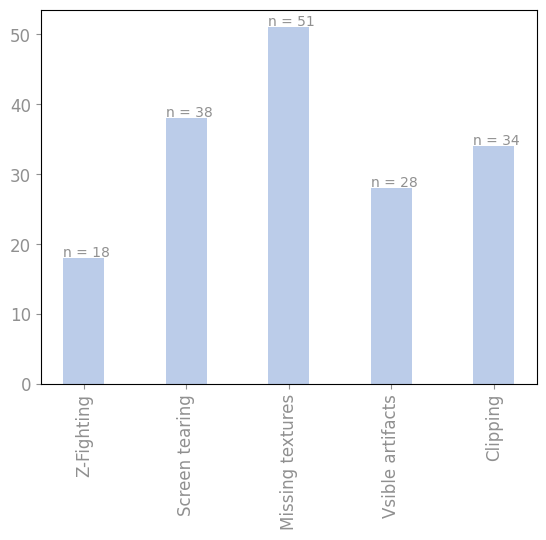

In [46]:
visual_faults_df = pd.DataFrame(results['faults-visual'])

plot_bar_using_df(visual_faults_df)

# Audio Faults

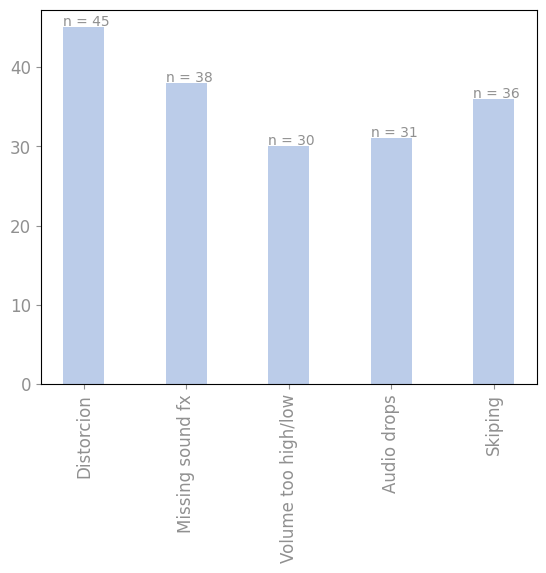

In [47]:
audio_faults_df = pd.DataFrame(results['faults-audio'])

plot_bar_using_df(audio_faults_df)

# Design Level Faults

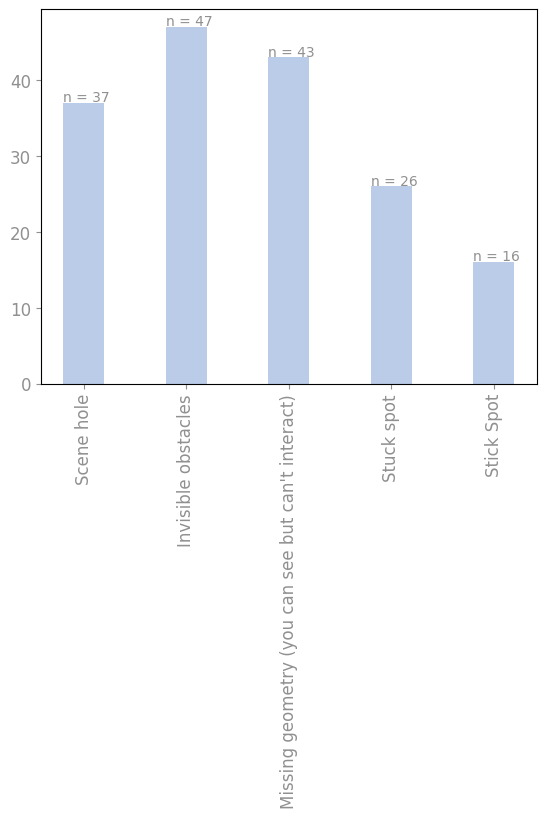

In [48]:
design_faults_df = pd.DataFrame(results['faults-level_design'])

plot_bar_using_df(design_faults_df)


# Artifitial Inteligence Faults

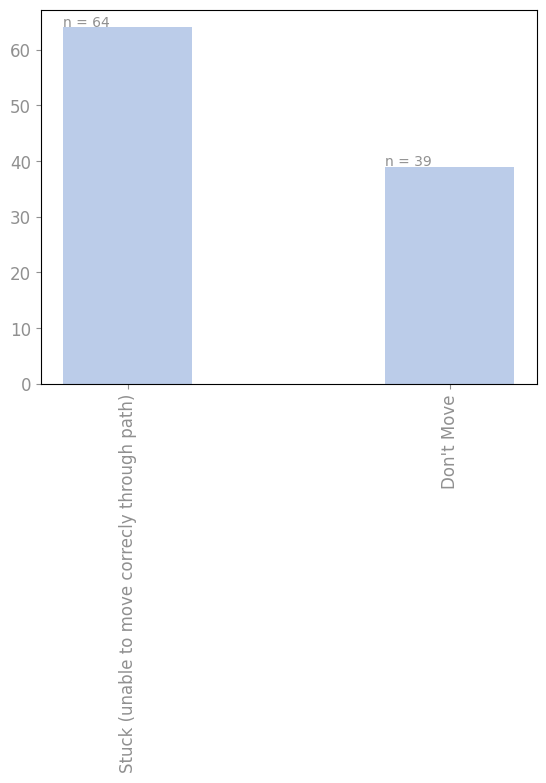

In [49]:
ia_faults_df = pd.DataFrame(results['faults-ia'])

plot_bar_using_df(ia_faults_df)


# Physics Faults

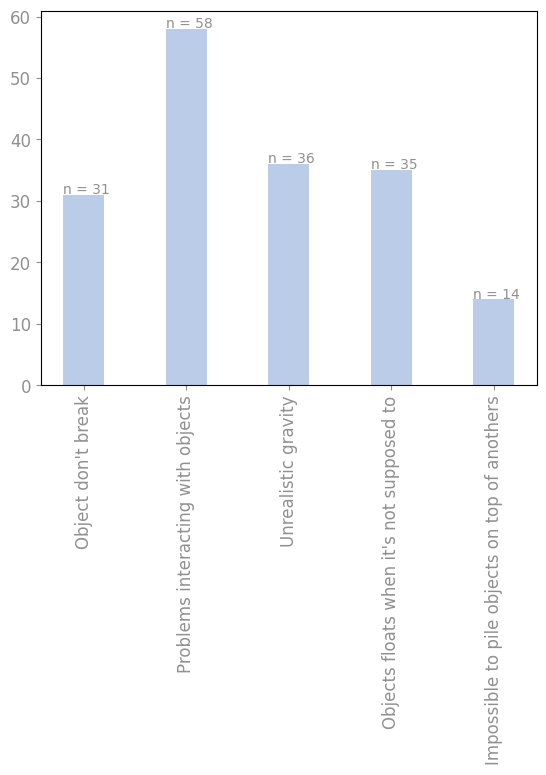

In [50]:
physics_faults_df = pd.DataFrame(results['faults-physiscs'])

plot_bar_using_df(physics_faults_df)

# Stability Faults

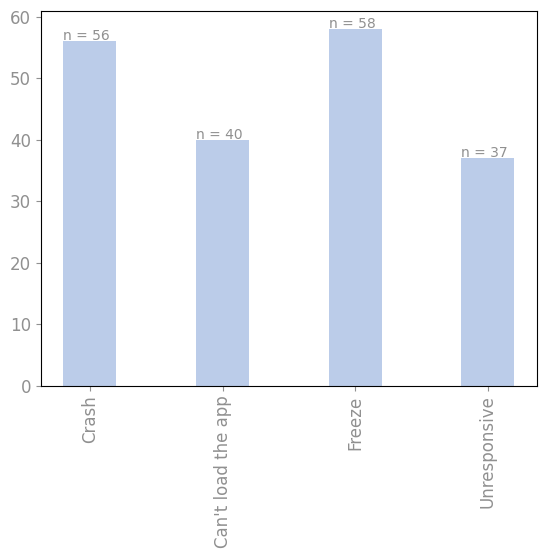

In [51]:
stability_faults_df = pd.DataFrame(results['faults-stability'])

plot_bar_using_df(stability_faults_df)


# Performance Faults

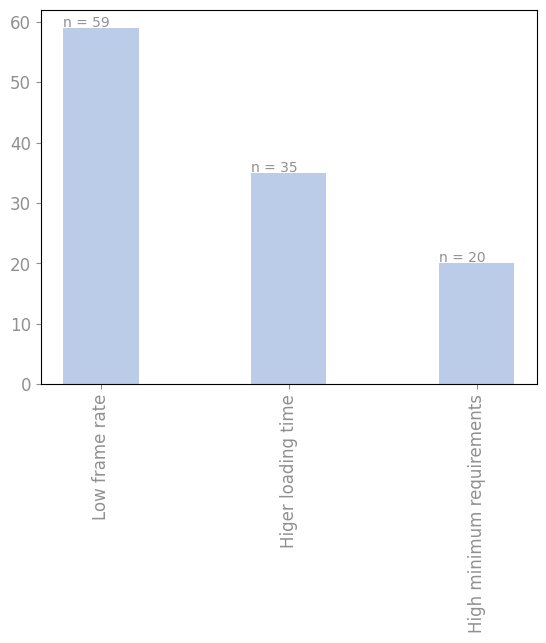

In [52]:
performance_faults_df = pd.DataFrame(results['faults-performance'])

plot_bar_using_df(performance_faults_df)

# Networking Faults

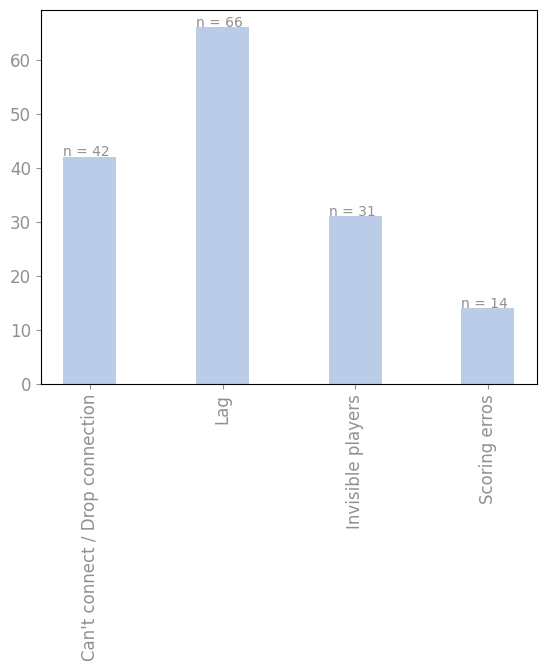

In [53]:
net_faults_df = pd.DataFrame(results['faults-net'])

plot_bar_using_df(net_faults_df)